In [80]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

start_date = '2020-11-27'
end_date = '2020-12-08'
ticker = 'CSCO'
SP500 = np.log(web.DataReader('^GSPC', start=start_date, end=end_date, data_source='yahoo')['Adj Close'])
SPreturn = SP500/SP500.shift(1)
df = web.DataReader(ticker, start=start_date, end=end_date, data_source='yahoo')
df['return'] = np.log(df['Adj Close'])/np.log(df['Adj Close']).shift(1)
df['volatility'] = 2*(df['High']-df['Low'])/(df['High']+df['Low'])
df['excess return'] = df['return'] - SPreturn
df = df[['Volume', 'excess return', 'volatility']][1:]

tweets = pd.read_csv('./tweets/'+ticker+'.csv',index_col=0)
tweets['createdate'] = tweets['createdate'].apply(lambda x: x[:10])
tweets_sentiment = tweets.groupby(['createdate', 'sentiment']).size().unstack()

df = df.join(tweets_sentiment)
df['SA'] = df['positive'] - df['negative']
df['SR'] = (df['positive'] - df['negative'])/(df['positive'] + df['negative'])

In [88]:
df

,Volume,excess return,volatility,negative,neutral,positive,SA,SR
Date,,,,,,,,
2020-11-30,34741600,0.002551,0.014978,168,765,644,476,0.586207
2020-12-01,23948800,0.001826,0.024345,222,926,659,437,0.496027
2020-12-02,17422200,0.001904,0.013973,227,923,898,671,0.596444
2020-12-03,27710700,0.001398,0.012309,205,799,699,494,0.546460
2020-12-04,17319800,0.000540,0.014027,220,1009,850,630,0.588785
2020-12-07,14086800,0.000058,0.013122,274,1214,693,419,0.433299
2020-12-08,13341500,-0.000220,0.013565,275,962,834,559,0.504058


In [92]:
df.corr().iloc[:3,3:]

,negative,neutral,positive,SA,SR
Volume,-0.916016,-0.805605,-0.656152,-0.345271,0.410899
excess return,-0.867164,-0.730147,-0.348478,-0.034377,0.566353
volatility,-0.146643,-0.094781,-0.382532,-0.352914,-0.184297


Text(0, 0.5, 'SR')

<Figure size 288x288 with 0 Axes>

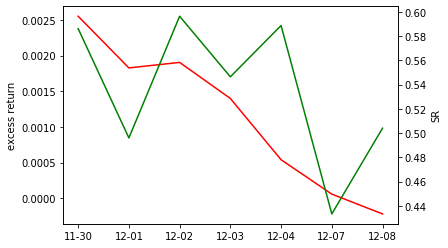

In [112]:
x = [str(i)[5:10] for i in df.index]
plt.figure(figsize = (4, 4))
fig, ax1 = plt.subplots(1,1) 
ax1.plot(x, df['excess return'],c='r')
ax1.set_ylabel('excess return')
ax2 = ax1.twinx() 
ax2.plot(x, df['SR'], c='g')
ax2.set_ylabel('SR')

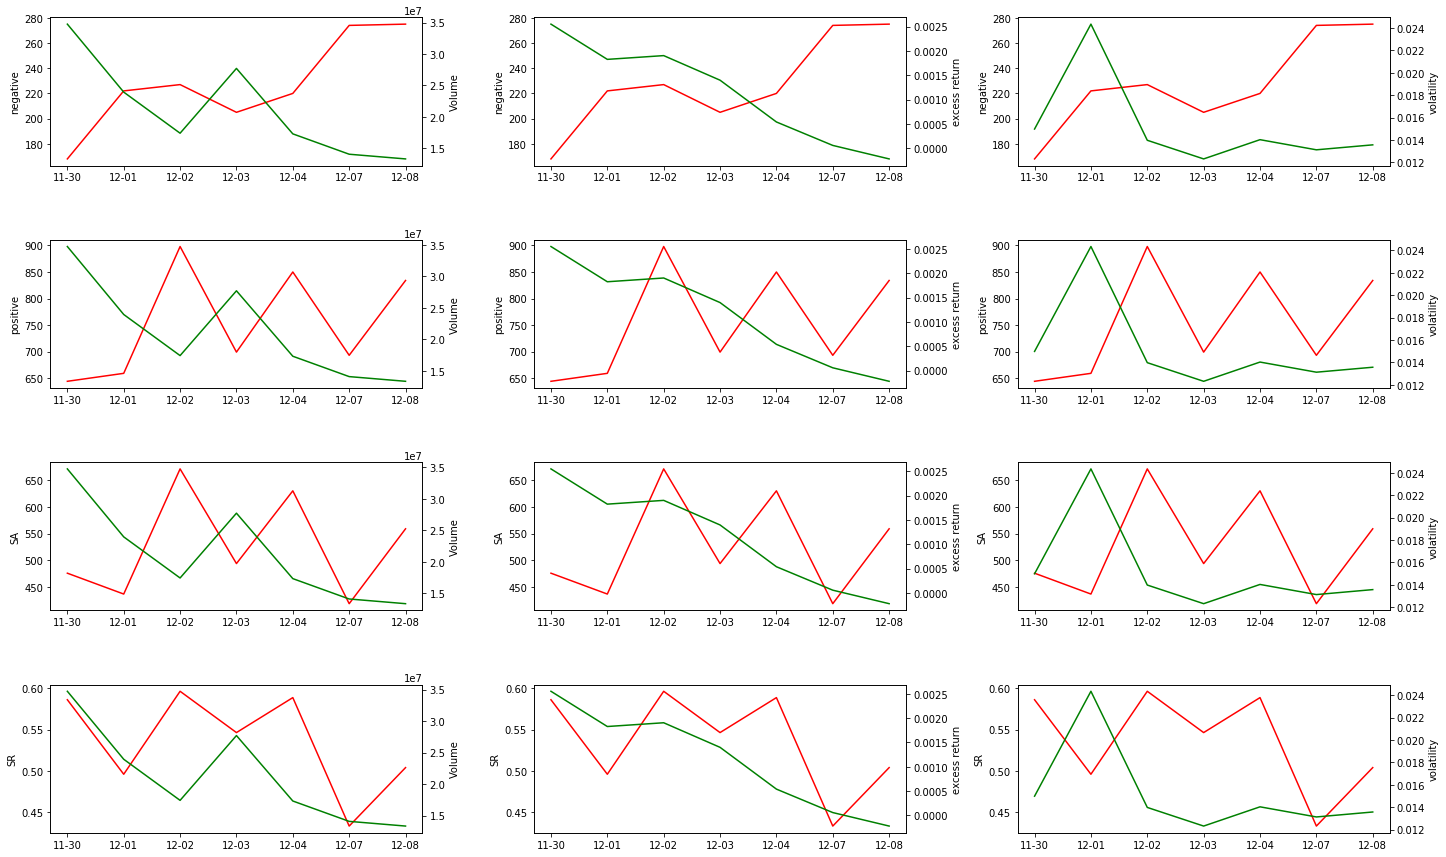

In [129]:
x = [str(i)[5:10] for i in df.index]
sentiment_indicators = ['negative', 'positive', 'SA', 'SR']
market_indicators = ['Volume', 'excess return', 'volatility']
plt.figure(figsize = (24, 15))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
k = 1
for i in range(len(sentiment_indicators)):
    for j in range(len(market_indicators)):
        ax1 = plt.subplot(4,3,k)
        ax1.plot(x, df[sentiment_indicators[i]],c='r')
        ax1.set_ylabel(sentiment_indicators[i])
        ax2 = ax1.twinx() 
        ax2.plot(x, df[market_indicators[j]], c='g')
        ax2.set_ylabel(market_indicators[j])
        k +=1

In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
market_data = pd.read_csv('market_data.csv')

In [12]:
def get_timezoom(x):
    if x[1]!=':':
        t = int(x[:2])
    else:
        t = int(x[0])
    return str(t//6)

In [13]:
abt_market = market_data[market_data['SYM_ROOT']=='ABT']
abt_market['timezoom'] = abt_market['TIME_M'].apply(lambda x: get_timezoom(x))
abt_market['createdate'] = abt_market['DATE'].apply(lambda x: str(x)) + ' '+ abt_market['timezoom']
abt_market = abt_market[['SIZE', 'PRICE', 'createdate']]

In [31]:
abt_size = abt_market.groupby(['createdate']).sum()['SIZE']
abt_high = abt_market.groupby(['createdate']).max()['PRICE']
abt_low = abt_market.groupby(['createdate']).min()['PRICE']
abt_close = abt_market.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[0])

In [32]:
abt_market_zoom = pd.DataFrame([abt_size, abt_high, abt_low, abt_close]).T
abt_market_zoom.columns = ['volume','high', 'low', 'close']
abt_market_zoom['volatility'] = 2*(abt_market_zoom['high']-abt_market_zoom['low'])/(abt_market_zoom['low']+abt_market_zoom['high'])
abt_market_zoom['return'] = np.log(abt_market_zoom['close'])/np.log(abt_market_zoom['close'].shift(1))

,volume,high,low,close,volatility,return
createdate,,,,,,
20201127 0,1062.0,107.48,106.41,106.4800,0.010005,NaN
20201127 1,1296997.0,107.63,105.85,107.3700,0.016676,1.001783
20201127 2,1990615.0,108.33,107.00,107.2400,0.012353,0.999741
20201130 0,20.0,107.87,107.36,107.6200,0.004739,1.000757
20201130 1,1272526.0,108.58,107.00,107.4000,0.014658,0.999563
20201130 2,7084643.0,108.35,107.26,107.4800,0.010111,1.000159
20201130 3,2563375.0,108.35,108.19,108.2500,0.001478,1.001526
20201201 0,402.0,109.05,108.59,108.5900,0.004227,1.000669
20201201 1,1479732.0,109.60,108.22,108.9500,0.012671,1.000706


In [40]:
spy = pd.read_csv('SPY.csv')
spy['timezoom'] = spy['TIME_M'].apply(lambda x: get_timezoom(x))
spy['createdate'] = spy['DATE'].apply(lambda x: str(x)) + ' '+ spy['timezoom']
spy_zoom = pd.DataFrame(spy.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[0]))
spy_zoom.columns = ['close']
spy_zoom['return'] = np.log(spy_zoom['close'])/np.log(spy_zoom['close'].shift(1))

In [47]:
abt_market_zoom['excess_return'] = abt_market_zoom['return'] - spy_zoom['return']
abt_market_zoom = abt_market_zoom[['volume', 'volatility', 'excess_return']]

In [49]:
abt_tweet = pd.read_csv('./tweets/ABT.csv', index_col=0)
abt_tweet['createdate'] = abt_tweet['createdate'].apply(lambda x: x[:4]+x[5:7]+x[8:10]+' '+x[12])
abt_tweet_groupby = abt_tweet.groupby(['createdate','sentiment']).size().unstack()

In [62]:
abt = abt_market_zoom.join(abt_tweet_groupby).iloc[3:,:].fillna(0)

In [64]:
abt

,volume,volatility,excess_return,negative,neutral,positive
createdate,,,,,,
20201130 0,20.0,0.004739,0.001332,0.0,0.0,0.0
20201130 1,1272526.0,0.014658,-0.000447,0.0,0.0,0.0
20201130 2,7084643.0,0.010111,0.001038,0.0,4.0,1.0
20201130 3,2563375.0,0.001478,0.000394,0.0,1.0,1.0
20201201 0,402.0,0.004227,-0.000501,0.0,0.0,2.0
20201201 1,1479732.0,0.012671,0.000280,1.0,0.0,0.0
20201201 2,4177653.0,0.009211,-0.000380,0.0,0.0,0.0
20201201 3,1304913.0,0.002030,-0.000867,0.0,0.0,0.0
20201202 0,25.0,0.004527,0.000530,0.0,0.0,0.0


zoom = 4
days = list(set([i[4:6]+'-'+i[6:8] for i in ticker.index]))
zooms = []
for i in range(int(24//zoom)):
    t = str(i*4)
    if int(t)<10:
        t = '0'+t+':00'
    else:
        t = t + ':00'
    zooms.append(t)
x = []
for i in range(len(days)):
    for j in range(len(zooms)):
        x.append(days[i]+' '+zooms[j])
x = sorted(x)

In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import matplotlib.ticker
import mplfinance as mpf
import seaborn as sns

warnings.filterwarnings('ignore')

In [7]:
def get_aggregate_df(ticker, zoom=4):
    
    def get_timezoom(x, zoom):
        if x[1]!=':':
            t = int(x[:2])
        else:
            t = int(x[0])
        return str(t//zoom)

    ticker_market = market_data[market_data['SYM_ROOT']==ticker]
    ticker_market['timezoom'] = ticker_market['TIME_M'].apply(lambda x: get_timezoom(x, zoom))
    ticker_market['createdate'] = ticker_market['DATE'].apply(lambda x: str(x)) + ' '+ ticker_market['timezoom']
    ticker_market = ticker_market[['SIZE', 'PRICE', 'createdate']]
    
    ticker_size = ticker_market.groupby(['createdate']).sum()['SIZE']
    ticker_high = ticker_market.groupby(['createdate']).max()['PRICE']
    ticker_low = ticker_market.groupby(['createdate']).min()['PRICE']
    ticker_open = ticker_market.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[0])
    ticker_close = ticker_market.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[-1])
    ticker_market_zoom = pd.DataFrame([ticker_size, ticker_high, ticker_low, ticker_open, ticker_close]).T
    ticker_market_zoom.columns = ['volume','high', 'low', 'open', 'close']
    
    ticker_market_zoom['volatility'] = 2*(ticker_market_zoom['high']-ticker_market_zoom['low'])/(ticker_market_zoom['low']+ticker_market_zoom['high'])
    ticker_market_zoom['return'] = np.log(ticker_market_zoom['close'])/np.log(ticker_market_zoom['open'])
    
    spy = pd.read_csv('SPY.csv')
    spy['timezoom'] = spy['TIME_M'].apply(lambda x: get_timezoom(x, zoom))
    spy['createdate'] = spy['DATE'].apply(lambda x: str(x)) + ' '+ spy['timezoom']
    spy_zoom = pd.DataFrame(columns=['close','open'])
    spy_zoom['open'] = spy.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[0])
    spy_zoom['close'] = spy.groupby(['createdate'])['PRICE'].apply(lambda x: x.iloc[-1])
    spy_zoom['return'] = np.log(spy_zoom['close'])/np.log(spy_zoom['open'])
    
    ticker_market_zoom['excess_return'] = ticker_market_zoom['return'] - spy_zoom['return']
#     ticker_market_zoom = ticker_market_zoom[['volume', 'volatility', 'excess_return']]
    
    ticker_tweet = pd.read_csv('./tweets/' + ticker + '.csv', index_col=0)
    ticker_tweet['createdate'] = ticker_tweet['createdate'].apply(lambda x: x[:4]+x[5:7]+x[8:10]+' '+str(int(x[12])//zoom))
    ticker_tweet_groupby = ticker_tweet.groupby(['createdate','sentiment']).size().unstack()
    
    ticker = ticker_market_zoom.merge(ticker_tweet_groupby, on='createdate', how='outer').iloc[3:,:]
    
    days = ['20201130','20201201', '20201202', '20201203', '20201204', '20201207', '20201208']
    zooms = [i for i in range(int(24/zoom))]
    x = []
    for day in days:
        for t in zooms:
            x.append(day+' '+ str(t))
    empty_df = pd.DataFrame(index=x)
    empty_df.index.name='createdate'
    ticker = empty_df.merge(ticker,on='createdate',how='left').sort_index()
    return ticker

In [8]:
def get_x_axis(zoom):
    days = ['11-30','12-01', '12-02', '12-03', '12-04', '12-07', '12-08']
    zooms = []
    for i in range(int(24//zoom)):
        t = str(i*4)
        if int(t)<10:
            t = '0'+t+':00'
        else:
            t = t + ':00'
        zooms.append(t)
    x = []
    for i in range(len(days)):
        for j in range(len(zooms)):
            x.append(days[i]+' '+zooms[j])
    return sorted(x)

In [86]:
def draw_aggregate_graph(code, ticker_df, x, zoom):
    y0 = ticker_df['excess_return']
    y1 = ticker_df['volatility']
    y2 = ticker_df['volume']
    if 'positive' in ticker_df.columns and 'negative' in ticker_df.columns:
        y3 = ticker_df['positive'] - ticker_df['negative']
    elif 'positive' in ticker_df.columns:
        y3 = ticker_df['positive']
    else:
        y3 = ticker_df['negative']
    
    sns.set_style("whitegrid")
    colors = sns.color_palette("RdBu_r")
    fig = plt.figure(figsize = (20, 15))
    gs = gridspec.GridSpec(4, 1) 

    ax0 = plt.subplot(gs[0])
    line0, = ax0.plot(x, y0, color=colors[0])

    ax1 = plt.subplot(gs[1], sharex = ax0)
    line1 = ax1.bar(x, y1, color=colors[1])
    plt.setp(ax0.get_xticklabels(), visible=False)

    ax2 = plt.subplot(gs[2], sharex = ax0)
    line2 = ax2.bar(x, y2, color=colors[4])
    plt.setp(ax1.get_xticklabels(), visible=False)

    ax3 = plt.subplot(gs[3], sharex = ax0)
    line3 = ax3.bar(x, y3, color=colors[5])
    plt.setp(ax2.get_xticklabels(), visible=False)

    ax0.legend((line0, line1, line2, line3), ('excess return', 'volatility', 'volume','pos-neg'), loc='lower left')
    
    if zoom == 4:
        base = 3
    elif zoom == 1:
        base = 12
    ax0.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=base))
        
    plt.subplots_adjust(hspace=.0)
    plt.show()
#     plt.savefig('./figures/' + code + '.jpg')
    print(code+'\'s figure has been saved.')

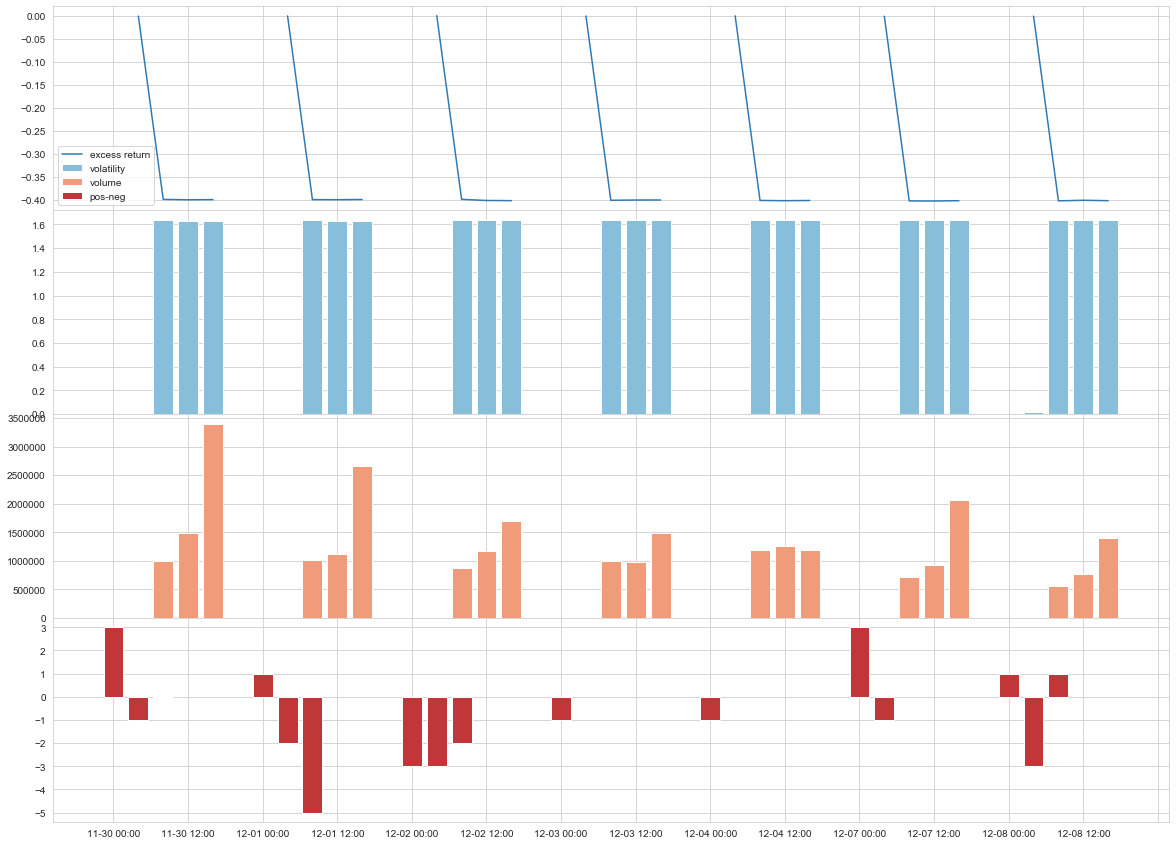

GS's figure has been saved.


In [87]:
code = 'GS'
num_tweets = len(pd.read_csv('./tweets/' + code + '.csv', index_col=0))
if num_tweets>=5000:
    zoom = 1
else:
    zoom = 4

ticker_df = get_aggregate_df(code,zoom)
x = get_x_axis(zoom)
draw_aggregate_graph(code, ticker_df, x, zoom)

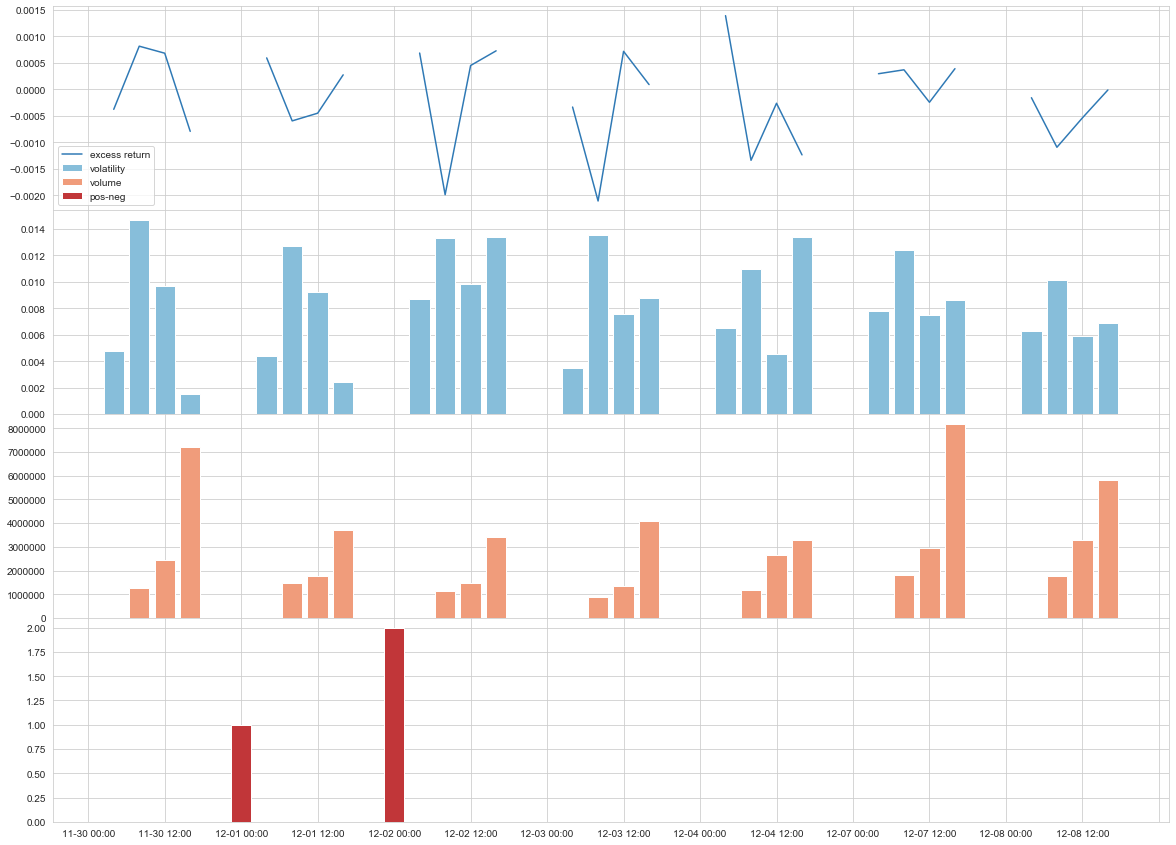

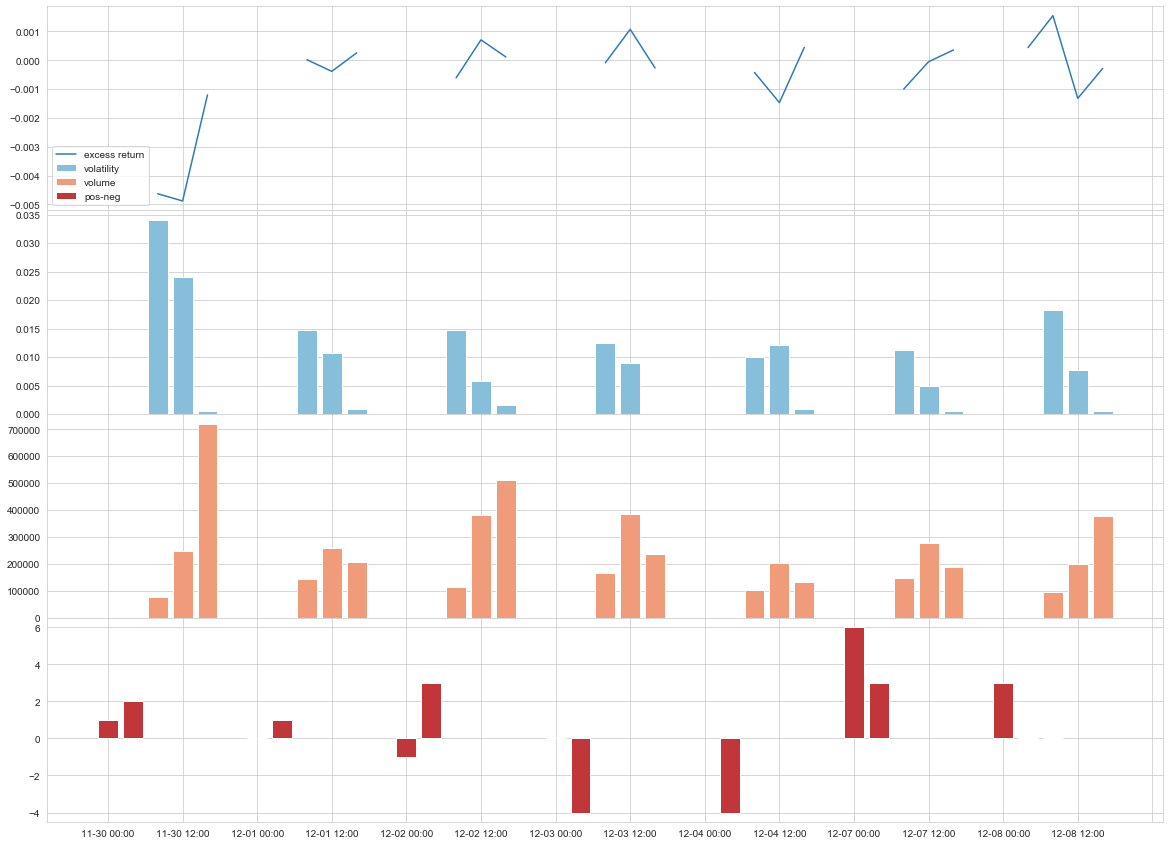

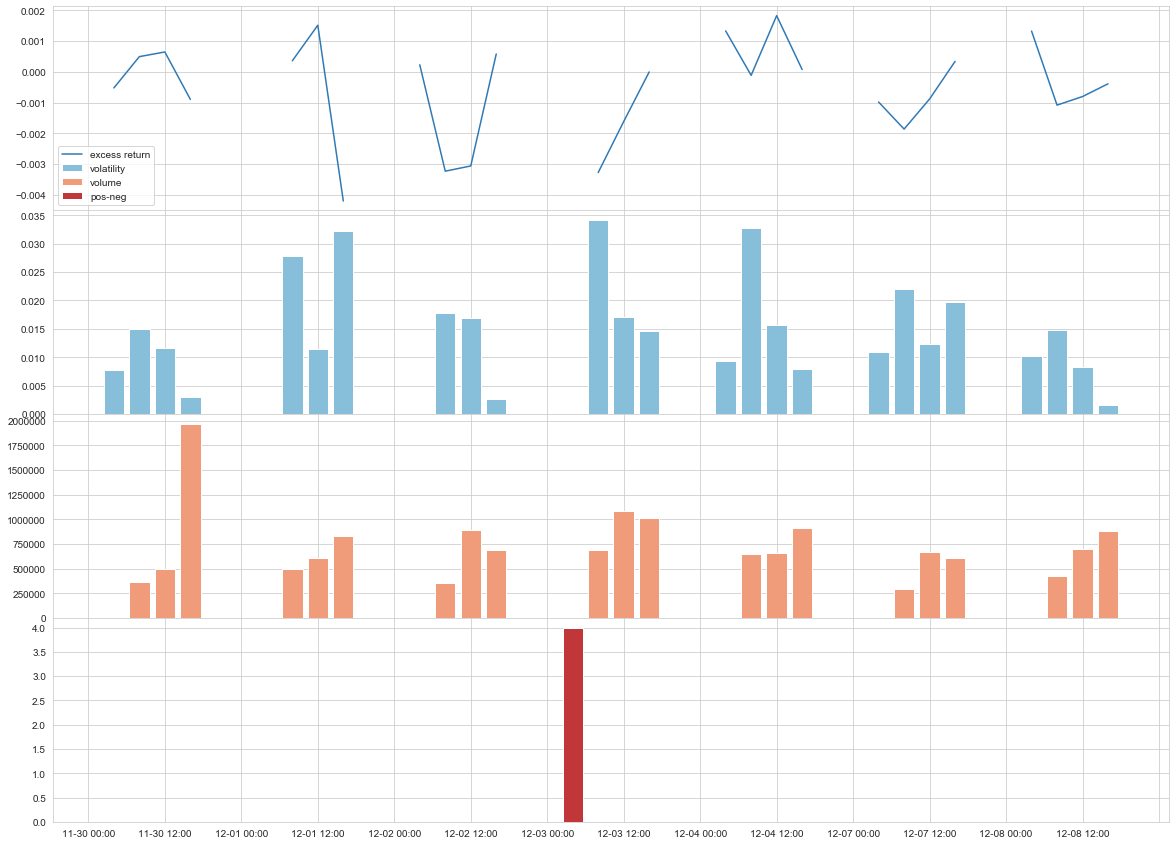

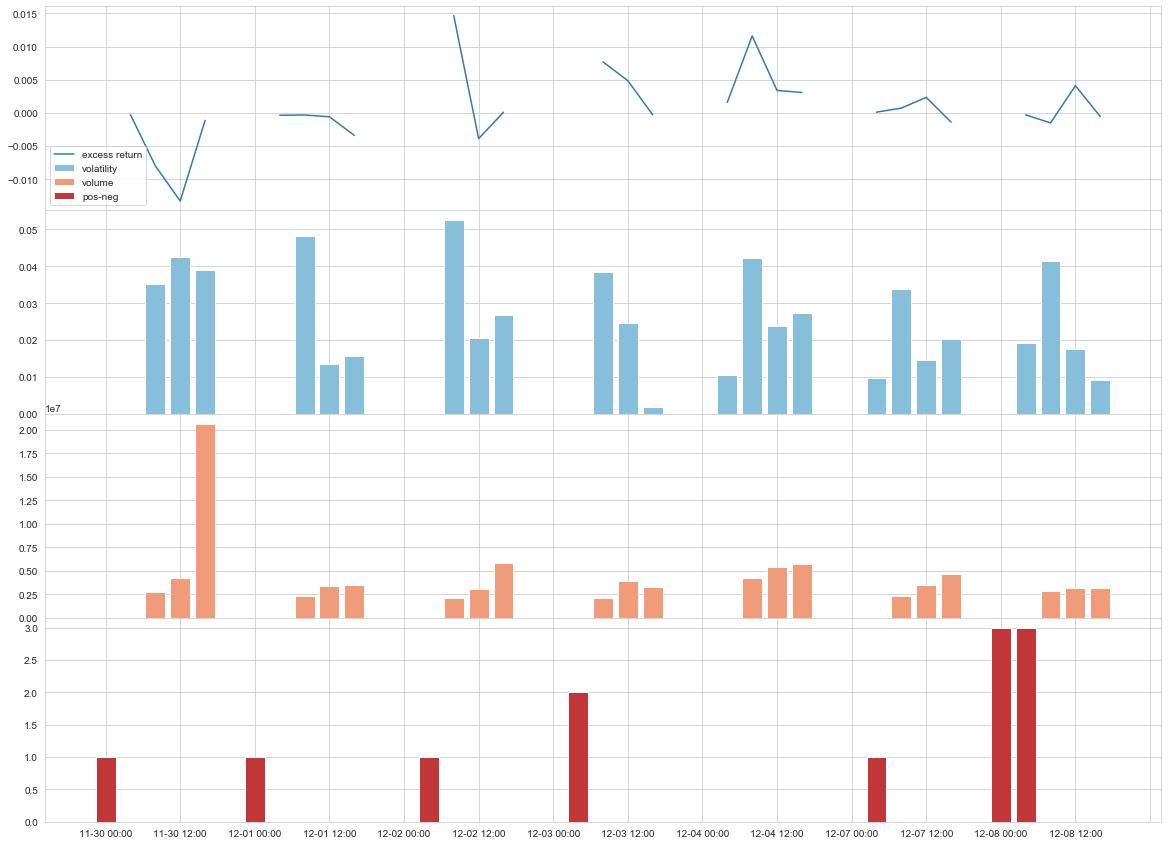

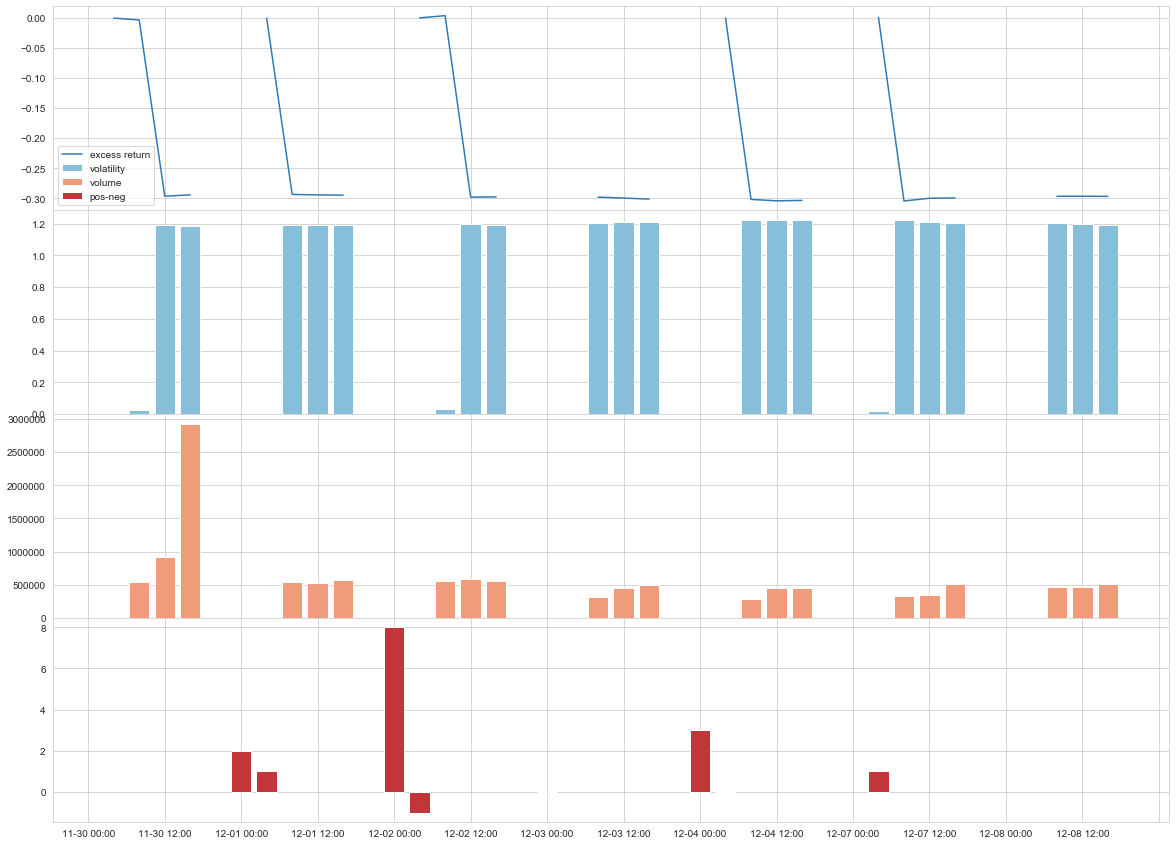

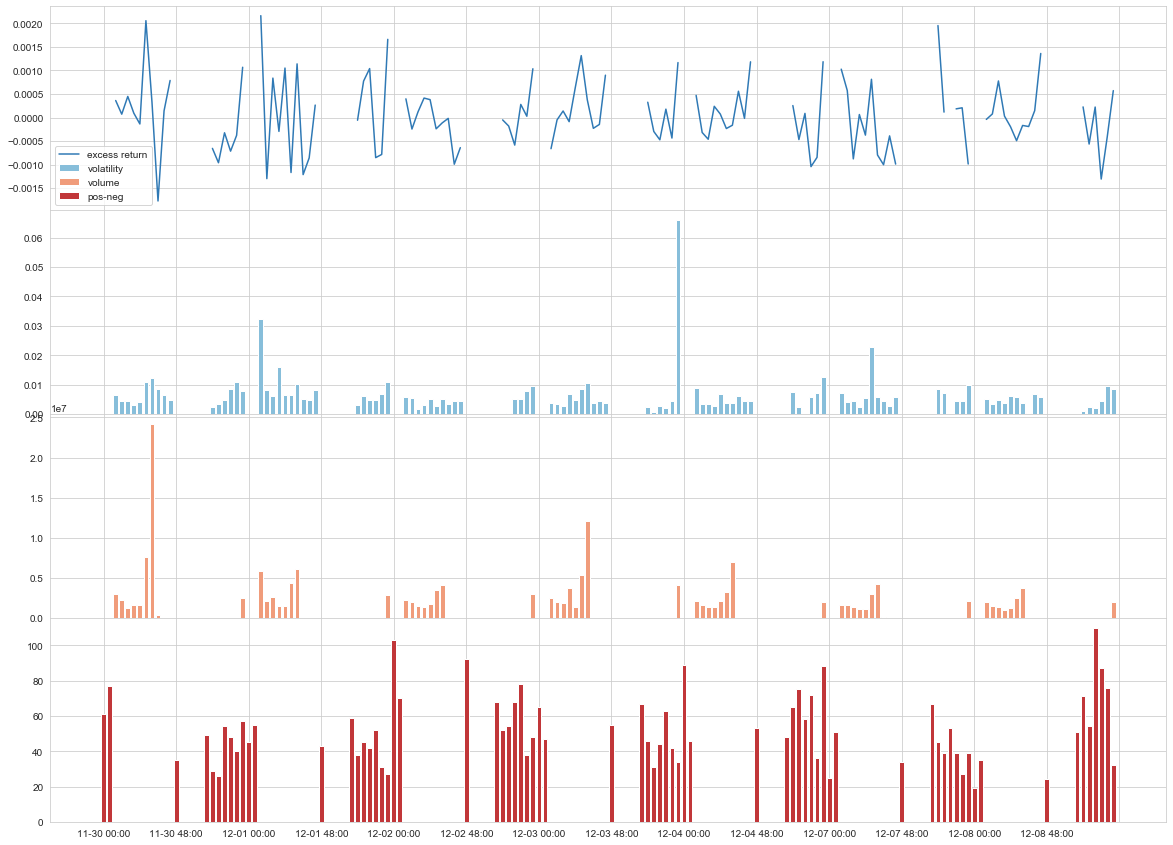

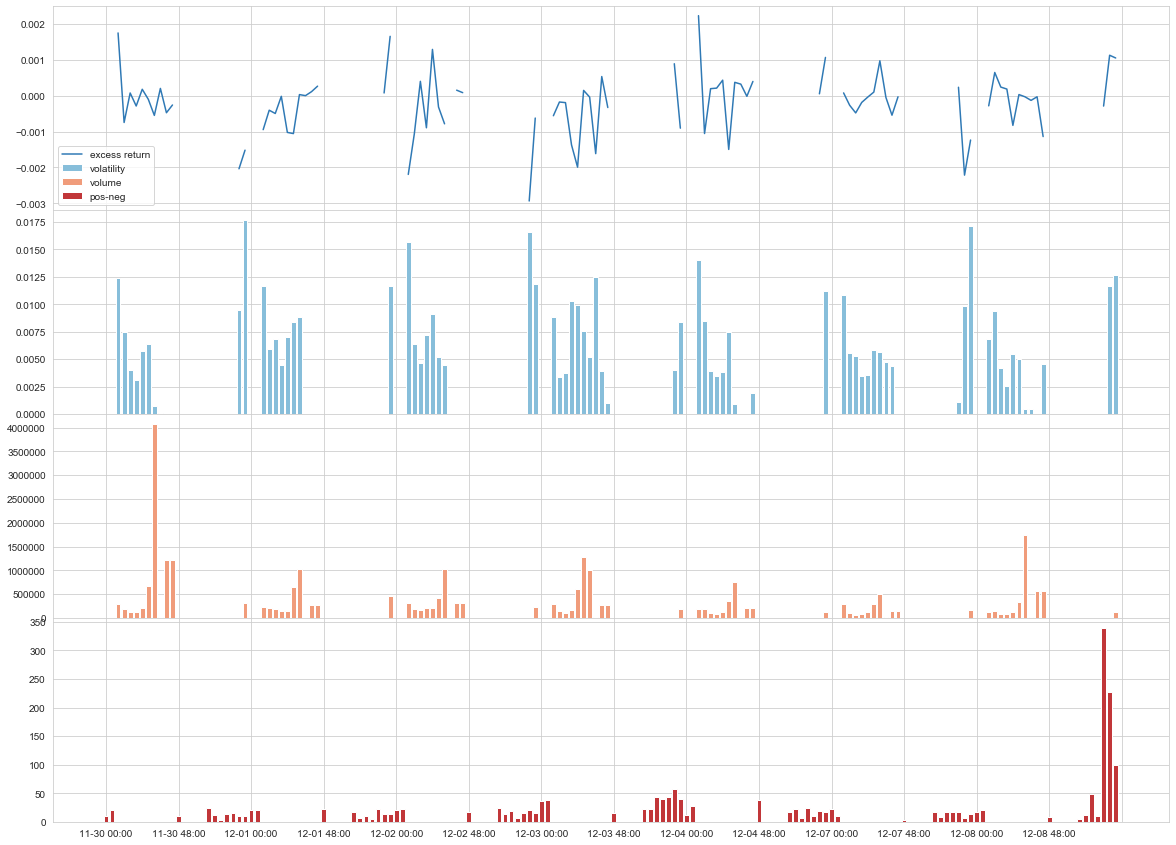

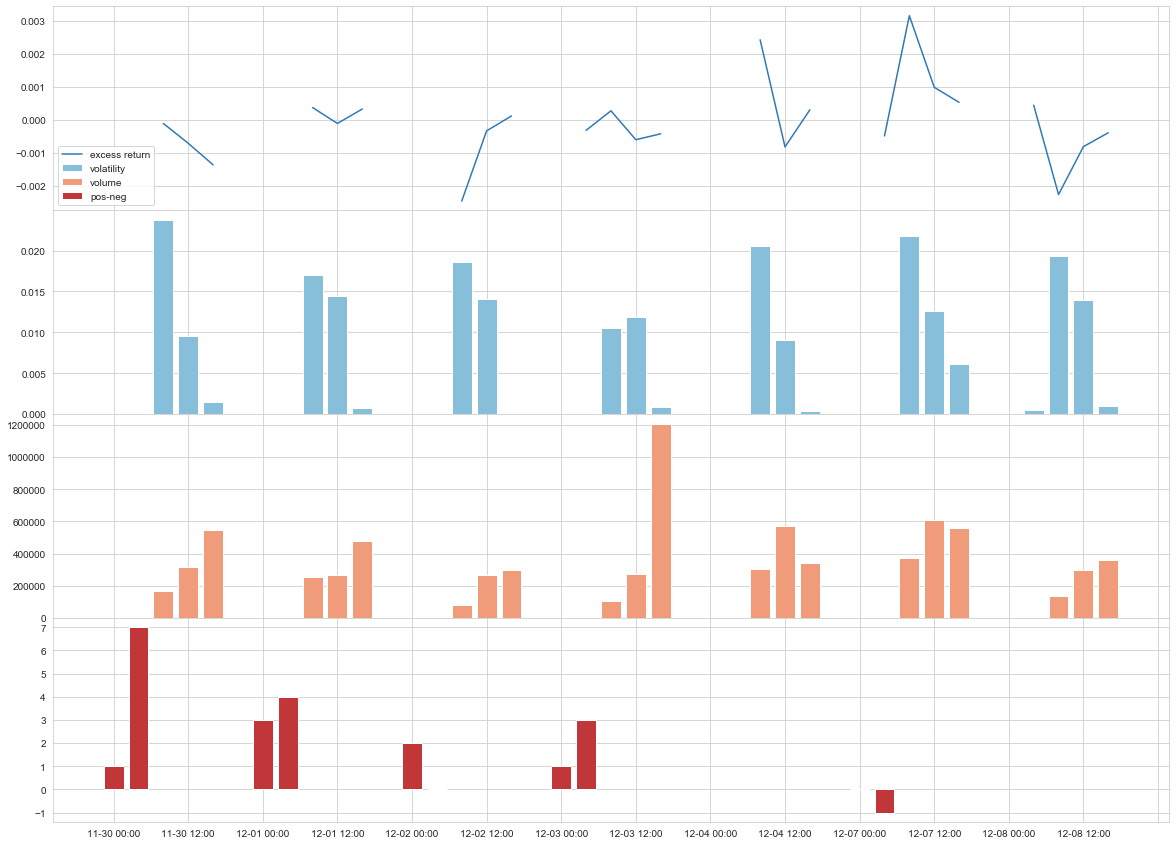

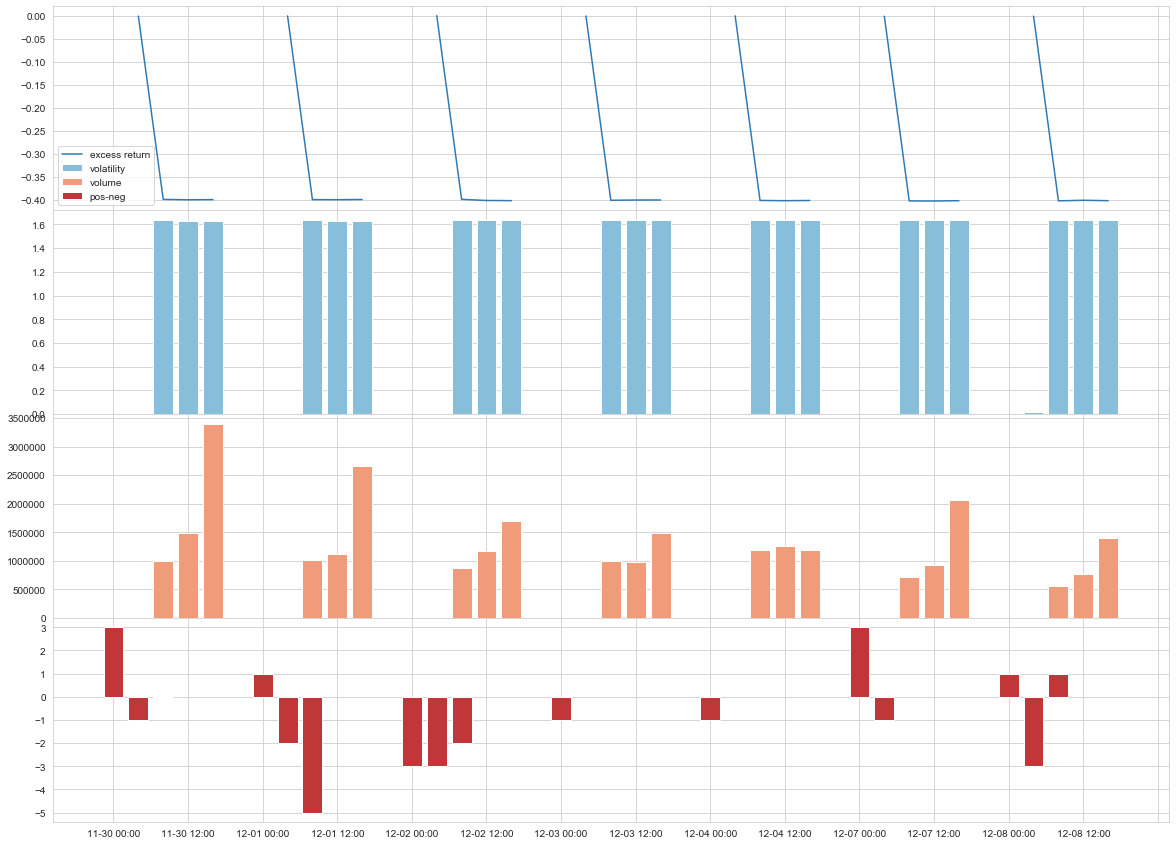

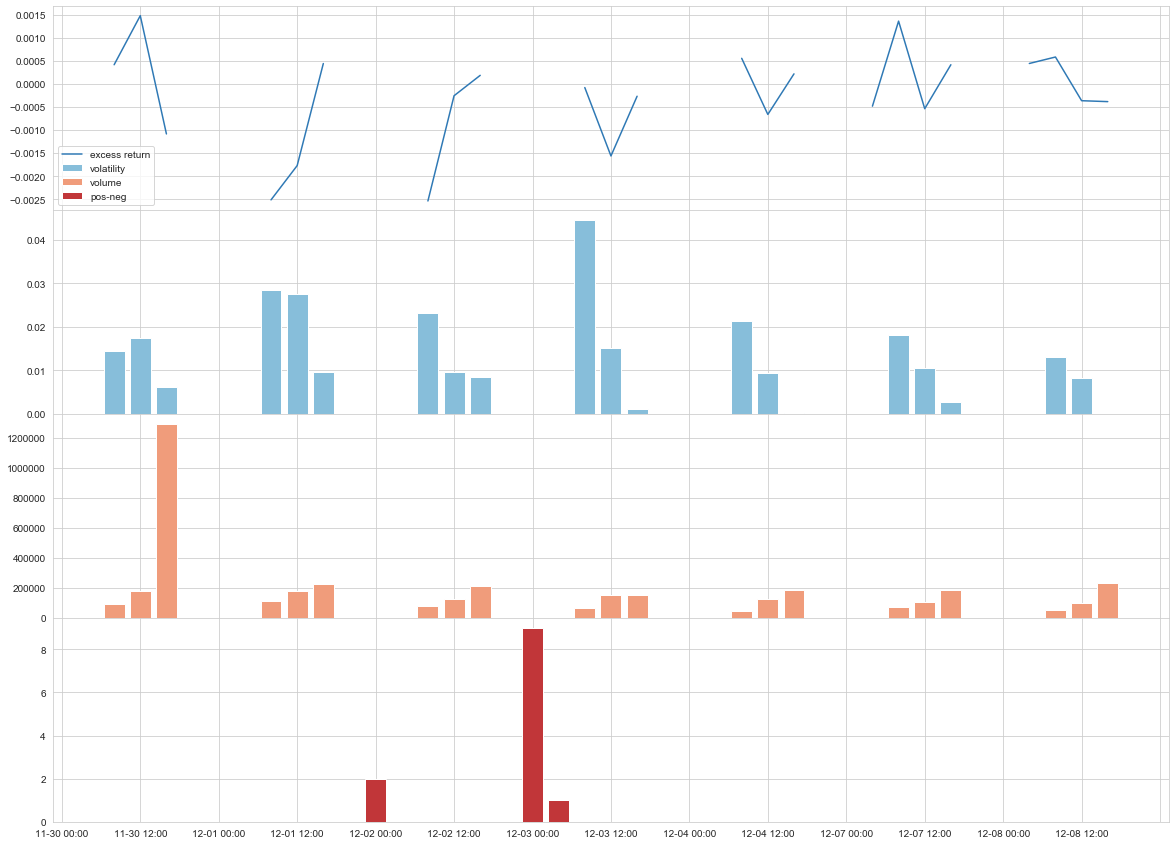

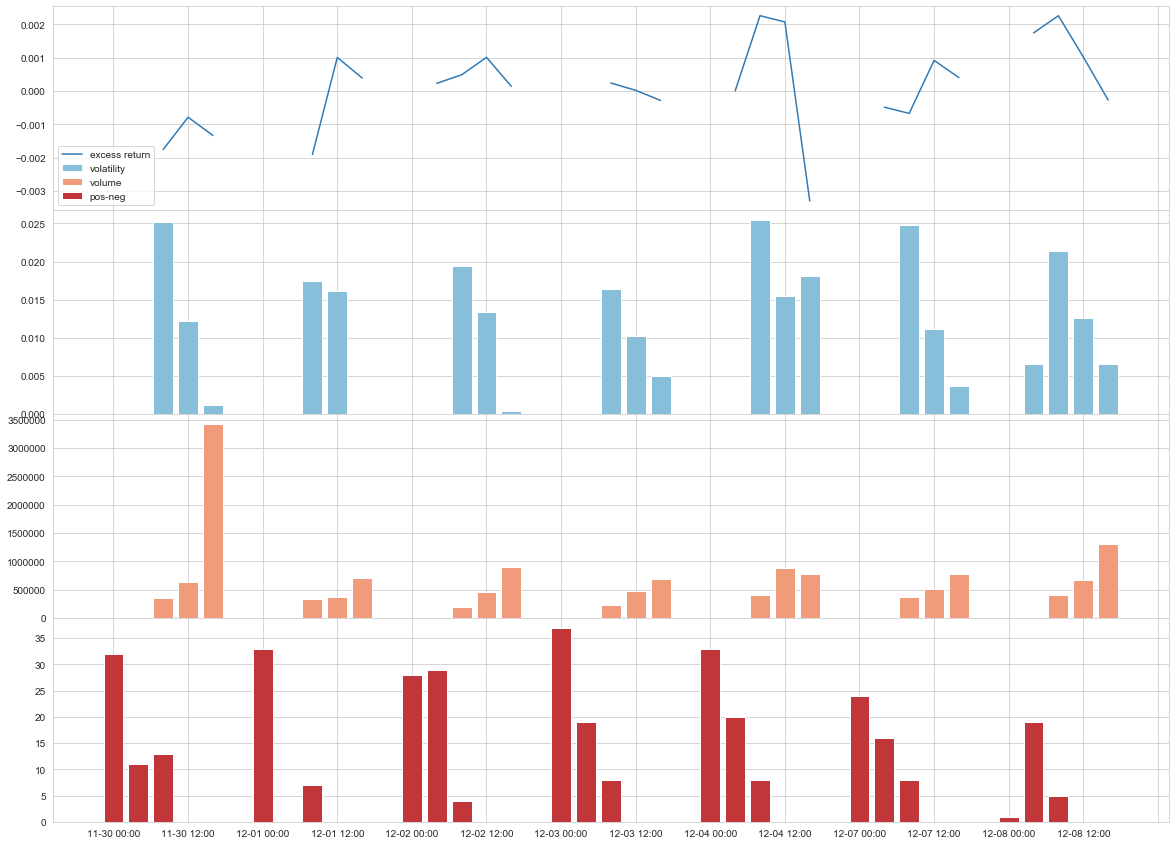

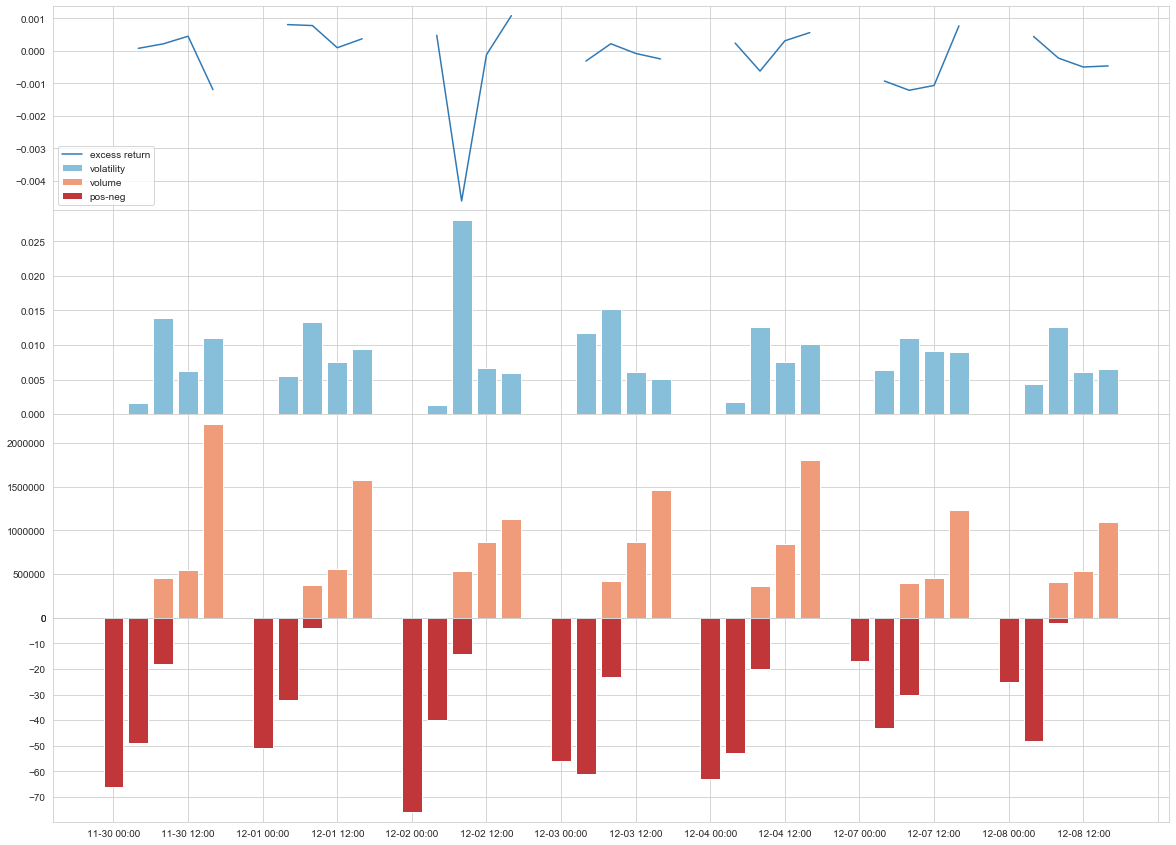

In [54]:
market_data = pd.read_csv('market_data.csv')
codes = ['ABT', 'AIZ', 'APD','BKR','BXP','CSCO', 'ETN', 'FLT','GS','GWW','HCA', 'WM']
for code in codes:
    num_tweets = len(pd.read_csv('./tweets/' + code + '.csv', index_col=0))
    if num_tweets>=5000:
        zoom = 1
    else:
        zoom = 4
        
    ticker_df = get_aggregate_df(code,zoom)
    x = get_x_axis(zoom)
    draw_aggregate_graph(code, ticker_df, x, zoom)